# Data analysis

In [ ]:
import pandas as pd

merged_by_ty = pd.read_csv('data/merged_by_ty.csv')
merged_by_ty

,VIDEO_NUM,P_ID,ARM,FIRST_SECOND,CASE_TITLE,P_BACKGROUND,SP_NAME,REVIEWER_NAME,REVIEWER_TYPE,Q1,...,Q14,Q15,Q16,Q17,Q18,Q19,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,video1829885929,1,S,First,Pat Smith,Student,SP11,SP11,SP,1,...,4,4,1,5,8,4,0.400,0.885714,0.733333,0.634783
1,video8829885929,1,S,Second,Lois Bell,Student,SP11,SP11,SP,2,...,3,4,4,5,7,5,0.675,1.000000,0.766667,0.782609
2,video1757986894,0,C,First,Lois Bell,PA,SP0,SP0,SP,5,...,5,5,4,5,10,10,0.675,0.857143,0.966667,0.834783
3,video2757986894,0,C,Second,Pat Smith,PA,SP0,SP0,SP,5,...,5,5,4,5,10,10,0.875,0.885714,0.966667,0.913043
4,video1631554860,2,S,First,Jill Cooper,Student,SP4,SP4,SP,5,...,2,3,5,2,2,2,0.550,0.828571,0.466667,0.582609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,video9840306571,35,S,Second,Lois Bell,Student,SP9,TP1,TP,4,...,4,4,2,4,8,7,0.600,0.828571,0.733333,0.713043
502,video9946328095,52,S,Second,Pat Smith,Doctor,SP9,TP2,TP,4,...,1,2,3,2,3,3,0.425,0.657143,0.366667,0.469565
503,video9946328095,52,S,Second,Pat Smith,Doctor,SP9,TP0,TP,1,...,3,3,4,3,6,4,0.325,0.600000,0.633333,0.495652
504,video9946328095,52,S,Second,Pat Smith,Doctor,SP9,TP3,TP,1,...,2,3,3,3,4,5,0.350,0.828571,0.500000,0.547826


In [ ]:
merged_by_ty = merged_by_ty[['P_ID', 'ARM', 'FIRST_SECOND', 'QSUM_EMPOWER',	'QSUM_EXPLICIT', 'QSUM_EMPATHY', 'QSUM_ALL']]
grouped_mean = merged_by_ty.groupby(['P_ID', 'ARM', 'FIRST_SECOND']).mean().reset_index()
grouped_mean

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,0,C,First,0.720,0.885714,0.906667,0.836522
1,0,C,Second,0.770,0.891429,0.946667,0.867826
2,1,S,First,0.390,0.748571,0.573333,0.556522
3,1,S,Second,0.430,0.794286,0.560000,0.579130
4,2,S,First,0.645,0.811429,0.646667,0.692174
...,...,...,...,...,...,...,...
97,61,C,Second,0.655,0.920000,0.806667,0.789565
98,62,C,First,0.650,0.891429,0.840000,0.779130
99,62,C,Second,0.770,0.754286,0.820000,0.775652
100,64,C,First,0.570,0.697143,0.660000,0.641739


In [ ]:
# from google.colab import sheets
# sheet = sheets.InteractiveSheet(df=grouped_mean)

In [ ]:
second = grouped_mean[grouped_mean['FIRST_SECOND']=='Second'].reset_index(drop=True)
first = grouped_mean[grouped_mean['FIRST_SECOND']=='First'].reset_index(drop=True)

In [ ]:
sophie_pre = grouped_mean[(grouped_mean['FIRST_SECOND']=='First') & (grouped_mean['ARM']=='S')].reset_index(drop=True)
sophie_post = grouped_mean[(grouped_mean['FIRST_SECOND']=='Second') & (grouped_mean['ARM']=='S')].reset_index(drop=True)
control_pre = grouped_mean[(grouped_mean['FIRST_SECOND']=='First') & (grouped_mean['ARM']=='C')].reset_index(drop=True)
control_post = grouped_mean[(grouped_mean['FIRST_SECOND']=='Second') & (grouped_mean['ARM']=='C')].reset_index(drop=True)

# Testing bias in Pre data

Choosing a slice of SOPHIE and Control group that doesn't have a significant difference in baseline

## Pre scores

In [ ]:
sophie_pre_empower = sorted(list(sophie_pre['QSUM_EMPOWER']))
control_pre_empower = sorted(list(control_pre['QSUM_EMPOWER']))
sophie_pre_explicit = sorted(list(sophie_pre['QSUM_EXPLICIT']))
control_pre_explicit = sorted(list(control_pre['QSUM_EXPLICIT']))
sophie_pre_empathy = sorted(list(sophie_pre['QSUM_EMPATHY']))
control_pre_empathy = sorted(list(control_pre['QSUM_EMPATHY']))
sophie_pre_all = sorted(list(sophie_pre['QSUM_ALL']))
control_pre_all = sorted(list(control_pre['QSUM_ALL']))

In [ ]:
# prompt: Run a t test to see if there is a statistically significant difference between these two lists

from scipy import stats

t_statistic, p_value = stats.ttest_ind(sophie_pre_empower, control_pre_empower)

print("Empower:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empower:
T-statistic: -2.222291404757024
P-value: 0.030911392856161127
There is a statistically significant difference between the two groups.


In [ ]:
t_statistic, p_value = stats.ttest_ind(sophie_pre_explicit, control_pre_explicit)

print("be Explicit:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

be Explicit:
T-statistic: -1.6948902206423015
P-value: 0.09644328128038562
There is no statistically significant difference between the two groups.


In [ ]:
t_statistic, p_value = stats.ttest_ind(sophie_pre_empathy, control_pre_empathy)

print("Empathy:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empathy:
T-statistic: -1.6116058911398177
P-value: 0.11347121271131239
There is no statistically significant difference between the two groups.


In [ ]:
t_statistic, p_value = stats.ttest_ind(sophie_pre_all, control_pre_all)

print("All:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

All:
T-statistic: -2.0845629914766666
P-value: 0.04234292898901537
There is a statistically significant difference between the two groups.


## Post scores

In [ ]:
sophie_post_empower = sorted(list(sophie_post['QSUM_EMPOWER']))
control_post_empower = sorted(list(control_post['QSUM_EMPOWER']))
sophie_post_explicit = sorted(list(sophie_post['QSUM_EXPLICIT']))
control_post_explicit = sorted(list(control_post['QSUM_EXPLICIT']))
sophie_post_empathy = sorted(list(sophie_post['QSUM_EMPATHY']))
control_post_empathy = sorted(list(control_post['QSUM_EMPATHY']))

In [ ]:
t_statistic, p_value = stats.ttest_ind(sophie_post_empower, control_post_empower)

print("Empathy:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empathy:
T-statistic: 0.8741247028025588
P-value: 0.38631455645205226
There is no statistically significant difference between the two groups.


In [ ]:
t_statistic, p_value = stats.ttest_ind(sophie_post_explicit, control_post_explicit)

print("Empathy:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empathy:
T-statistic: 1.3599069024433676
P-value: 0.18008395536096963
There is no statistically significant difference between the two groups.


In [ ]:
t_statistic, p_value = stats.ttest_ind(sophie_post_empathy, control_post_empathy)

print("Empathy:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empathy:
T-statistic: -0.046479570487440926
P-value: 0.9631169356670146
There is no statistically significant difference between the two groups.


<ipython-input-21-8c38a6f01a65>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sophie_post_empathy, hist=False, kde=True,
<ipython-input-21-8c38a6f01a65>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_post_empathy, hist=False, kde=True,


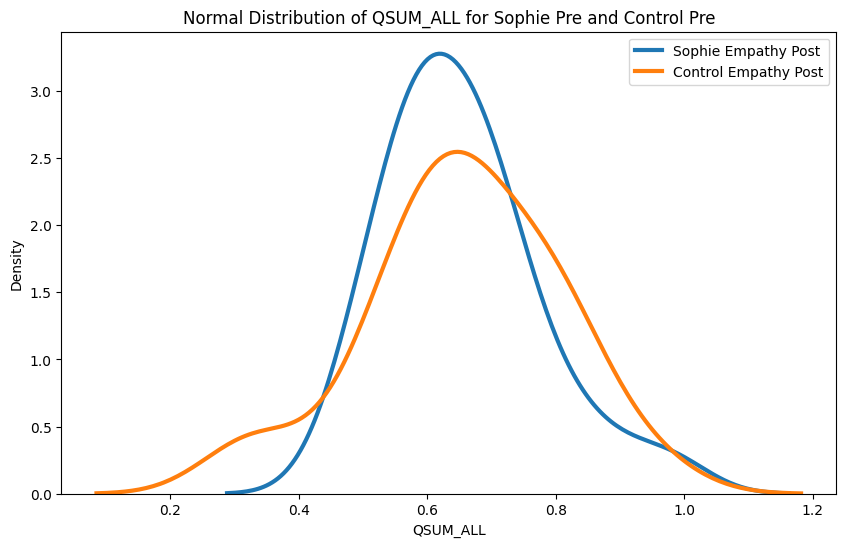

In [ ]:
# prompt: Plot these two graphs in a normal distribution in one figure

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming sophie_pre_all and control_pre_all are your data

plt.figure(figsize=(10, 6))

# Plot the first distribution
sns.distplot(sophie_post_empathy, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Sophie Empathy Post')

# Plot the second distribution
sns.distplot(control_post_empathy, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Control Empathy Post')

plt.xlabel('QSUM_ALL')
plt.ylabel('Density')
plt.title('Normal Distribution of QSUM_ALL for Sophie Pre and Control Pre')
plt.legend()
plt.show()


## Delta scores

In [ ]:
control_diff = pd.DataFrame()
control_diff['DIFF_EMPOWER'] = control_post['QSUM_EMPOWER'] - control_pre['QSUM_EMPOWER']
control_diff['DIFF_EXPLICIT'] = control_post['QSUM_EXPLICIT'] - control_pre['QSUM_EXPLICIT']
control_diff['DIFF_EMPATHY'] = control_post['QSUM_EMPATHY'] - control_pre['QSUM_EMPATHY']
control_diff['DIFF_ALL'] = control_post['QSUM_ALL'] - control_pre['QSUM_ALL']
control_diff

,DIFF_EMPOWER,DIFF_EXPLICIT,DIFF_EMPATHY,DIFF_ALL
0,0.05000,0.005714,0.040000,0.031304
1,0.09500,0.057143,0.086667,0.086957
2,0.02000,0.017143,0.100000,0.038261
3,-0.06000,0.108571,0.000000,0.010435
4,0.40000,0.245714,0.380000,0.349565
5,0.00500,-0.108571,-0.046667,-0.048696
6,-0.15000,0.097143,0.126667,0.012174
7,0.17500,0.120000,0.146667,0.146087
8,0.13500,0.000000,0.220000,0.118261
9,0.07000,0.091429,0.120000,0.095652


In [ ]:
sophie_diff = pd.DataFrame()
sophie_diff['DIFF_EMPOWER'] = sophie_post['QSUM_EMPOWER'] - sophie_pre['QSUM_EMPOWER']
sophie_diff['DIFF_EXPLICIT'] = sophie_post['QSUM_EXPLICIT'] - sophie_pre['QSUM_EXPLICIT']
sophie_diff['DIFF_EMPATHY'] = sophie_post['QSUM_EMPATHY'] - sophie_pre['QSUM_EMPATHY']
sophie_diff['DIFF_ALL'] = sophie_post['QSUM_ALL'] - sophie_pre['QSUM_ALL']
sophie_diff

,DIFF_EMPOWER,DIFF_EXPLICIT,DIFF_EMPATHY,DIFF_ALL
0,0.040000,0.045714,-0.013333,0.022609
1,-0.100000,-0.034286,-0.013333,-0.050435
2,0.050000,0.182857,-0.033333,0.069565
3,0.405000,0.205714,0.320000,0.325217
4,0.205000,0.080000,0.240000,0.177391
5,0.295000,0.160000,0.246667,0.231304
6,0.315000,-0.017143,0.333333,0.217391
7,0.030000,-0.068571,0.040000,0.001739
8,0.217500,0.171429,0.145000,0.175217
9,0.221667,0.156190,0.104444,0.160000


In [ ]:
## Empower Diff statistical test
sophie_empower_diff = sorted(list(sophie_diff['DIFF_EMPOWER']))
control_empower_diff = sorted(list(control_diff['DIFF_EMPOWER']))

t_statistic, p_value = stats.ttest_ind(sophie_empower_diff, control_empower_diff)

print("Empower Diff:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empower Diff:
T-statistic: 3.0326583881060682
P-value: 0.0038688970726629894
There is a statistically significant difference between the two groups.


In [ ]:
## Explicit Diff statistical test
sophie_explicit_diff = sorted(list(sophie_diff['DIFF_EXPLICIT']))
control_explicit_diff = sorted(list(control_diff['DIFF_EXPLICIT']))

t_statistic, p_value = stats.ttest_ind(sophie_explicit_diff, control_explicit_diff)

print("Explicit Diff:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Explicit Diff:
T-statistic: 3.091972580598462
P-value: 0.0032773392376680443
There is a statistically significant difference between the two groups.


In [ ]:
## Empathy Diff statistical test
sophie_empathy_diff = sorted(list(sophie_diff['DIFF_EMPATHY']))
control_empathy_diff = sorted(list(control_diff['DIFF_EMPATHY']))

t_statistic, p_value = stats.ttest_ind(sophie_empathy_diff, control_empathy_diff)

print("Empathy Diff:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

Empathy Diff:
T-statistic: 2.1228112283446854
P-value: 0.03884665863403131
There is a statistically significant difference between the two groups.


# Table 3

## Control arm

In [ ]:
# Control Pre mean
print(f"{control_pre['QSUM_EMPOWER'].mean():.2f}")
print(f"{control_pre['QSUM_EXPLICIT'].mean():.2f}")
print(f"{control_pre['QSUM_EMPATHY'].mean():.2f}")
print(f"{control_pre['QSUM_ALL'].mean():.2f}")

0.49
0.71
0.58
0.59


In [ ]:
# Control Pre SD
print(f"{control_pre['QSUM_EMPOWER'].std():.2f}")
print(f"{control_pre['QSUM_EXPLICIT'].std():.2f}")
print(f"{control_pre['QSUM_EMPATHY'].std():.2f}")
print(f"{control_pre['QSUM_ALL'].std():.2f}")

0.14
0.11
0.16
0.13


In [ ]:
# Control Post mean
print(f"{control_post['QSUM_EMPOWER'].mean():.2f}")
print(f"{control_post['QSUM_EXPLICIT'].mean():.2f}")
print(f"{control_post['QSUM_EMPATHY'].mean():.2f}")
print(f"{control_post['QSUM_ALL'].mean():.2f}")

0.55
0.75
0.65
0.65


In [ ]:
# Control Post SD
print(f"{control_post['QSUM_EMPOWER'].std():.2f}")
print(f"{control_post['QSUM_EXPLICIT'].std():.2f}")
print(f"{control_post['QSUM_EMPATHY'].std():.2f}")
print(f"{control_post['QSUM_ALL'].std():.2f}")

0.13
0.11
0.15
0.12


In [ ]:
# Control Delta
print(f"{control_diff['DIFF_EMPOWER'].mean():.2f}")
print(f"{control_diff['DIFF_EXPLICIT'].mean():.2f}")
print(f"{control_diff['DIFF_EMPATHY'].mean():.2f}")
print(f"{control_diff['DIFF_ALL'].mean():.2f}")

0.06
0.05
0.07
0.06


In [ ]:
# Contol Pre-Post paired t test

# P-value for control group pre and post for Empower
t_statistic, p_value = stats.ttest_rel(control_pre['QSUM_EMPOWER'], control_post['QSUM_EMPOWER'])
print("\nControl Group - Empower (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# P-value for control group pre and post for Explicit
t_statistic, p_value = stats.ttest_rel(control_pre['QSUM_EXPLICIT'], control_post['QSUM_EXPLICIT'])
print("\nControl Group - Explicit (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# P-value for control group pre and post for Empathy
t_statistic, p_value = stats.ttest_rel(control_pre['QSUM_EMPATHY'], control_post['QSUM_EMPATHY'])
print("\nControl Group - Empathy (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

# P-value for control group pre and post for All
t_statistic, p_value = stats.ttest_rel(control_pre['QSUM_ALL'], control_post['QSUM_ALL'])
print("\nControl Group - All (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))


Control Group - Empower (Pre vs Post):
T-statistic: -2.786
P-value: 0.01

Control Group - Explicit (Pre vs Post):
T-statistic: -2.729
P-value: 0.012

Control Group - Empathy (Pre vs Post):
T-statistic: -3.556
P-value: 0.002

Control Group - All (Pre vs Post):
T-statistic: -3.498
P-value: 0.002


In [ ]:
import numpy as np

def cohens_d(list1, list2):
    # Convert lists to numpy arrays
    x1 = np.array(list1)
    x2 = np.array(list2)
    # Calculate means
    mean1 = np.mean(x1)
    mean2 = np.mean(x2)
    # Calculate sample standard deviations
    s1 = np.std(x1, ddof=1)
    s2 = np.std(x2, ddof=1)
    # Sample sizes
    n1, n2 = len(x1), len(x2)
    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    # Cohen's d
    d = (mean1 - mean2) / pooled_std
    return d

In [ ]:
def interpret_cohens_d(cohens_d_value):
  if abs(cohens_d_value) < 0.2:
    return "Small"
  elif abs(cohens_d_value) < 0.5:
    return "Medium"
  else:
    return "Large"

In [ ]:
# Calculate Cohen's d for Control Pre-Post for each variable
cohens_d_empower_control = cohens_d(control_post['QSUM_EMPOWER'], control_pre['QSUM_EMPOWER'])
cohens_d_explicit_control = cohens_d(control_post['QSUM_EXPLICIT'], control_pre['QSUM_EXPLICIT'])
cohens_d_empathy_control = cohens_d(control_post['QSUM_EMPATHY'], control_pre['QSUM_EMPATHY'])
cohens_d_all_control = cohens_d(control_post['QSUM_ALL'], control_pre['QSUM_ALL'])

# print two decimal places
print(f"Empower: {cohens_d_empower_control:.2f}", interpret_cohens_d(cohens_d_empower_control))
print(f"Explicit: {cohens_d_explicit_control:.2f}", interpret_cohens_d(cohens_d_explicit_control))
print(f"Empathy: {cohens_d_empathy_control:.2f}", interpret_cohens_d(cohens_d_empathy_control))
print(f"All: {cohens_d_all_control:.2f}", interpret_cohens_d(cohens_d_all_control))

Empower: 0.46 Medium
Explicit: 0.45 Medium
Empathy: 0.47 Medium
All: 0.48 Medium


In [ ]:
import numpy as np
def calculate_confidence_interval(data, confidence_level=0.95):
  degrees_of_freedom = len(data) - 1
  sample_mean = np.mean(data)
  sample_standard_error = stats.sem(data)
  confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, sample_mean, sample_standard_error)
  return confidence_interval

In [ ]:
# Control 95% CI

ci_control_empower_diff = calculate_confidence_interval(control_diff['DIFF_EMPOWER'])
print(f"Control Delta Empower 95% CI: ({ci_control_empower_diff[0]:.2f}, {ci_control_empower_diff[1]:.2f})")

ci_control_explicit_diff = calculate_confidence_interval(control_diff['DIFF_EXPLICIT'])
print(f"Control Delta Explicit 95% CI: ({ci_control_explicit_diff[0]:.2f}, {ci_control_explicit_diff[1]:.2f})")

ci_control_empathy_diff = calculate_confidence_interval(control_diff['DIFF_EMPATHY'])
print(f"Control Delta Empathy 95% CI: ({ci_control_empathy_diff[0]:.2f}, {ci_control_empathy_diff[1]:.2f})")

ci_control_all_diff = calculate_confidence_interval(control_diff['DIFF_ALL'])
print(f"Control Delta All 95% CI: ({ci_control_all_diff[0]:.2f}, {ci_control_all_diff[1]:.2f})")

Control Delta Empower 95% CI: (0.02, 0.11)
Control Delta Explicit 95% CI: (0.01, 0.08)
Control Delta Empathy 95% CI: (0.03, 0.12)
Control Delta All 95% CI: (0.03, 0.10)


## SOPHIE arm

In [ ]:
# SOPHIE pre mean
print(f"{sophie_pre['QSUM_EMPOWER'].mean():.2f}")
print(f"{sophie_pre['QSUM_EXPLICIT'].mean():.2f}")
print(f"{sophie_pre['QSUM_EMPATHY'].mean():.2f}")
print(f"{sophie_pre['QSUM_ALL'].mean():.2f}")

0.41
0.66
0.51
0.52


In [ ]:
# SOPHIE pre SD
print(f"{sophie_pre['QSUM_EMPOWER'].std():.2f}")
print(f"{sophie_pre['QSUM_EXPLICIT'].std():.2f}")
print(f"{sophie_pre['QSUM_EMPATHY'].std():.2f}")
print(f"{sophie_pre['QSUM_ALL'].std():.2f}")

0.10
0.08
0.14
0.09


In [ ]:
# SOPHIE post mean
print(f"{sophie_post['QSUM_EMPOWER'].mean():.2f}")
print(f"{sophie_post['QSUM_EXPLICIT'].mean():.2f}")
print(f"{sophie_post['QSUM_EMPATHY'].mean():.2f}")
print(f"{sophie_post['QSUM_ALL'].mean():.2f}")

0.58
0.79
0.65
0.67


In [ ]:
# SOPHIE post SD
print(f"{sophie_post['QSUM_EMPOWER'].std():.2f}")
print(f"{sophie_post['QSUM_EXPLICIT'].std():.2f}")
print(f"{sophie_post['QSUM_EMPATHY'].std():.2f}")
print(f"{sophie_post['QSUM_ALL'].std():.2f}")

0.12
0.07
0.12
0.10


In [ ]:
# SOPHIE delta
print(f"{sophie_diff['DIFF_EMPOWER'].mean():.2f}")
print(f"{sophie_diff['DIFF_EXPLICIT'].mean():.2f}")
print(f"{sophie_diff['DIFF_EMPATHY'].mean():.2f}")
print(f"{sophie_diff['DIFF_ALL'].mean():.2f}")

0.17
0.13
0.14
0.15


In [ ]:
# SOPHIE 95% CI

ci_sophie_empower_diff = calculate_confidence_interval(sophie_diff['DIFF_EMPOWER'])
print(f"Sophie Delta Empower 95% CI: ({ci_sophie_empower_diff[0]:.2f}, {ci_sophie_empower_diff[1]:.2f})")

ci_sophie_explicit_diff = calculate_confidence_interval(sophie_diff['DIFF_EXPLICIT'])
print(f"Sophie Delta Explicit 95% CI: ({ci_sophie_explicit_diff[0]:.2f}, {ci_sophie_explicit_diff[1]:.2f})")

ci_sophie_empathy_diff = calculate_confidence_interval(sophie_diff['DIFF_EMPATHY'])
print(f"Sophie Delta Empathy 95% CI: ({ci_sophie_empathy_diff[0]:.2f}, {ci_sophie_empathy_diff[1]:.2f})")

ci_sophie_all_diff = calculate_confidence_interval(sophie_diff['DIFF_ALL'])
print(f"Sophie Delta All 95% CI: ({ci_sophie_all_diff[0]:.2f}, {ci_sophie_all_diff[1]:.2f})")

Sophie Delta Empower 95% CI: (0.11, 0.22)
Sophie Delta Explicit 95% CI: (0.09, 0.17)
Sophie Delta Empathy 95% CI: (0.09, 0.19)
Sophie Delta All 95% CI: (0.11, 0.19)


In [ ]:
# SOPHIE pre post pairwise t test
t_statistic, p_value = stats.ttest_rel(sophie_pre['QSUM_EMPOWER'], sophie_post['QSUM_EMPOWER'])
print("\nSophie Group - Empower (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

t_statistic, p_value = stats.ttest_rel(sophie_pre['QSUM_EXPLICIT'], sophie_post['QSUM_EXPLICIT'])
print("\nSophie Group - Explicit (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

t_statistic, p_value = stats.ttest_rel(sophie_pre['QSUM_EMPATHY'], sophie_post['QSUM_EMPATHY'])
print("\nSophie Group - Empathy (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))

t_statistic, p_value = stats.ttest_rel(sophie_pre['QSUM_ALL'], sophie_post['QSUM_ALL'])
print("\nSophie Group - All (Pre vs Post):")
print("T-statistic:", round(t_statistic, 3))
print("P-value:", round(p_value, 3))


Sophie Group - Empower (Pre vs Post):
T-statistic: -6.319
P-value: 0.0

Sophie Group - Explicit (Pre vs Post):
T-statistic: -6.65
P-value: 0.0

Sophie Group - Empathy (Pre vs Post):
T-statistic: -5.862
P-value: 0.0

Sophie Group - All (Pre vs Post):
T-statistic: -7.576
P-value: 0.0


In [ ]:
# Calculate Cohen's d for Sophie Pre-Post for each variable
cohens_d_empower_sophie = cohens_d(sophie_post['QSUM_EMPOWER'], sophie_pre['QSUM_EMPOWER'])
cohens_d_explicit_sophie = cohens_d(sophie_post['QSUM_EXPLICIT'], sophie_pre['QSUM_EXPLICIT'])
cohens_d_empathy_sophie = cohens_d(sophie_post['QSUM_EMPATHY'], sophie_pre['QSUM_EMPATHY'])
cohens_d_all_sophie = cohens_d(sophie_post['QSUM_ALL'], sophie_pre['QSUM_ALL'])


print(f"Empower: {cohens_d_empower_sophie:.2f}", interpret_cohens_d(cohens_d_empower_sophie))
print(f"Explicit: {cohens_d_explicit_sophie:.2f}", interpret_cohens_d(cohens_d_explicit_sophie))
print(f"Empathy: {cohens_d_empathy_sophie:.2f}", interpret_cohens_d(cohens_d_empathy_sophie))
print(f"All: {cohens_d_all_sophie:.2f}", interpret_cohens_d(cohens_d_all_sophie))

Empower: 1.53 Large
Explicit: 1.61 Large
Empathy: 1.07 Large
All: 1.55 Large


## Delta

In [ ]:
def compare_columns(col1, col2):
    """
    Takes two pandas Series (columns) as input and returns the t-test statistic,
    p-value, and Cohen's d.
    """
    # Drop missing values from both columns
    col1_clean = col1.dropna()
    col2_clean = col2.dropna()

    # Perform independent two-sample t-test (Welch's t-test for unequal variances)
    t_stat, p_val = stats.ttest_ind(col1_clean, col2_clean, equal_var=False)

    # Compute Cohen's d using the defined function
    d = cohens_d(col1_clean, col2_clean)

    ## Print p val 3 decimal, cohens d 2 decimal
    print(f"P-value: {p_val:.3f}")
    print(f"Cohen's d: {d:.2f}")

In [ ]:
print("Empower:")
compare_columns(sophie_diff['DIFF_EMPOWER'], control_diff['DIFF_EMPOWER'])
print("\nExplicit:")
compare_columns(sophie_diff['DIFF_EXPLICIT'], control_diff['DIFF_EXPLICIT'])
print("\nEmpathy:")
compare_columns(sophie_diff['DIFF_EMPATHY'], control_diff['DIFF_EMPATHY'])
print("\nAll:")
compare_columns(sophie_diff['DIFF_ALL'], control_diff['DIFF_ALL'])

Empower:
P-value: 0.004
Cohen's d: 0.85

Explicit:
P-value: 0.003
Cohen's d: 0.87

Empathy:
P-value: 0.038
Cohen's d: 0.59

All:
P-value: 0.002
Cohen's d: 0.92


# Filtering Sum

In [ ]:
sophie_pre_all = sorted(list(sophie_pre['QSUM_ALL']))
control_pre_all = sorted(list(control_pre['QSUM_ALL']))

sophie_pre_all, control_pre_all

([0.33391304347826084,
  0.35478260869565215,
  0.3965217391304347,
  0.40869565217391307,
  0.42608695652173917,
  0.4643478260869565,
  0.4678260869565217,
  0.48173913043478256,
  0.48521739130434777,
  0.49043478260869566,
  0.4973913043478261,
  0.5165217391304348,
  0.5165217391304349,
  0.5182608695652174,
  0.5356521739130435,
  0.5478260869565218,
  0.5530434782608695,
  0.5565217391304348,
  0.5652173913043479,
  0.5721739130434782,
  0.5739130434782609,
  0.6069565217391304,
  0.6104347826086957,
  0.6139130434782609,
  0.6921739130434783,
  0.7269565217391304],
 [0.4,
  0.4,
  0.4121739130434783,
  0.43130434782608695,
  0.43304347826086953,
  0.4504347826086956,
  0.4643478260869565,
  0.5182608695652174,
  0.5199999999999999,
  0.5269565217391304,
  0.5513043478260868,
  0.5669565217391305,
  0.5739130434782609,
  0.6139130434782609,
  0.6173913043478261,
  0.6191304347826087,
  0.6243478260869566,
  0.6417391304347826,
  0.6608695652173913,
  0.711304347826087,
  0.76347

In [ ]:
sophie_pre_filtered = sophie_pre[sophie_pre['QSUM_ALL'] > 0.4].reset_index(drop=True)
control_pre_filtered = control_pre[control_pre['QSUM_ALL'] < 0.72].reset_index(drop=True)
sophie_pids = list(sophie_pre_filtered['P_ID'])
control_pids = list(control_pre_filtered['P_ID'])

In [ ]:
control_pre_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,4,C,First,0.44500,0.594286,0.566667,0.526957
1,5,C,First,0.51500,0.720000,0.613333,0.613913
2,6,C,First,0.51500,0.737143,0.653333,0.624348
3,8,C,First,0.33000,0.542857,0.393333,0.412174
4,11,C,First,0.51000,0.737143,0.633333,0.619130
5,16,C,First,0.46500,0.674286,0.526667,0.551304
6,19,C,First,0.37000,0.828571,0.393333,0.520000
7,23,C,First,0.34500,0.565714,0.426667,0.433043
8,24,C,First,0.45000,0.645714,0.460000,0.518261
9,29,C,First,0.32500,0.634286,0.453333,0.464348


In [ ]:
sophie_post_filtered = sophie_post[sophie_post['P_ID'].isin(sophie_pids)].reset_index(drop=True)
sophie_post_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,1,S,Second,0.430000,0.794286,0.560000,0.579130
1,2,S,Second,0.545000,0.777143,0.633333,0.641739
2,7,S,Second,0.535000,0.794286,0.620000,0.643478
3,13,S,Second,0.605000,0.794286,0.606667,0.657391
4,17,S,Second,0.785000,0.720000,0.806667,0.765217
5,20,S,Second,0.405000,0.737143,0.720000,0.608696
6,21,S,Second,0.612500,0.828571,0.658333,0.693478
7,22,S,Second,0.791667,0.904762,0.977778,0.886957
8,25,S,Second,0.585000,0.771429,0.586667,0.645217
9,28,S,Second,0.585000,0.685714,0.500000,0.579130


In [ ]:
control_post_filtered = control_post[control_post['P_ID'].isin(control_pids)].reset_index(drop=True)
control_post_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,4,C,Second,0.540,0.651429,0.653333,0.613913
1,5,C,Second,0.535,0.737143,0.713333,0.652174
2,6,C,Second,0.455,0.845714,0.653333,0.634783
3,8,C,Second,0.730,0.788571,0.773333,0.761739
4,11,C,Second,0.515,0.628571,0.586667,0.570435
5,16,C,Second,0.640,0.794286,0.673333,0.697391
6,19,C,Second,0.505,0.828571,0.613333,0.638261
7,23,C,Second,0.415,0.657143,0.546667,0.528696
8,24,C,Second,0.590,0.737143,0.646667,0.655652
9,29,C,Second,0.530,0.720000,0.586667,0.606957


## Pre difference

In [ ]:
sophie_pre_all

[0.33391304347826084,
 0.35478260869565215,
 0.3965217391304347,
 0.40869565217391307,
 0.42608695652173917,
 0.4643478260869565,
 0.4678260869565217,
 0.48173913043478256,
 0.48521739130434777,
 0.49043478260869566,
 0.4973913043478261,
 0.5165217391304348,
 0.5165217391304349,
 0.5182608695652174,
 0.5356521739130435,
 0.5478260869565218,
 0.5530434782608695,
 0.5565217391304348,
 0.5652173913043479,
 0.5721739130434782,
 0.5739130434782609,
 0.6069565217391304,
 0.6104347826086957,
 0.6139130434782609,
 0.6921739130434783,
 0.7269565217391304]

In [ ]:
control_pre_all

[0.4,
 0.4,
 0.4121739130434783,
 0.43130434782608695,
 0.43304347826086953,
 0.4504347826086956,
 0.4643478260869565,
 0.5182608695652174,
 0.5199999999999999,
 0.5269565217391304,
 0.5513043478260868,
 0.5669565217391305,
 0.5739130434782609,
 0.6139130434782609,
 0.6173913043478261,
 0.6191304347826087,
 0.6243478260869566,
 0.6417391304347826,
 0.6608695652173913,
 0.711304347826087,
 0.7634782608695652,
 0.7721739130434783,
 0.7739130434782608,
 0.7791304347826087,
 0.8365217391304348]

<ipython-input-55-ab5697f5dca7>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sophie_pre_all, hist=False, kde=True,
<ipython-input-55-ab5697f5dca7>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_pre_all, hist=False, kde=True,


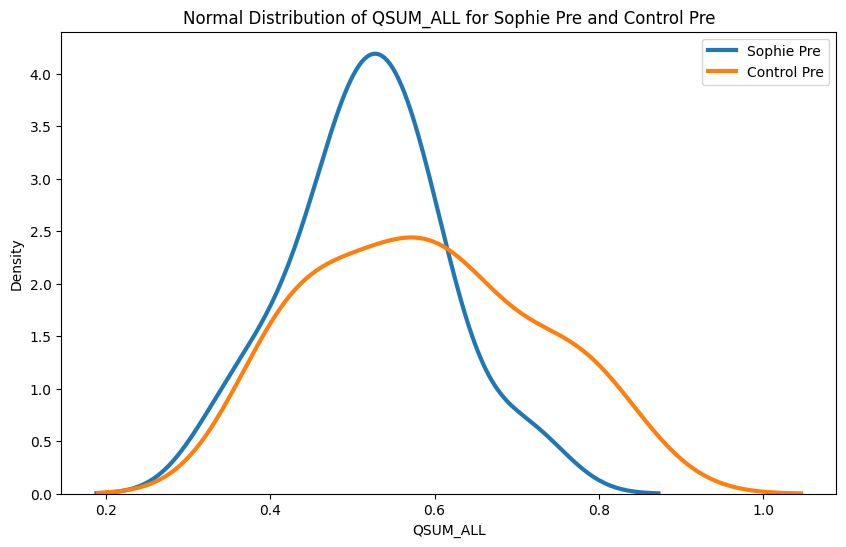

In [ ]:
# prompt: Plot these two graphs in a normal distribution in one figure

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming sophie_pre_all and control_pre_all are your data

plt.figure(figsize=(10, 6))

# Plot the first distribution
sns.distplot(sophie_pre_all, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Sophie Pre')

# Plot the second distribution
sns.distplot(control_pre_all, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Control Pre')

plt.xlabel('QSUM_ALL')
plt.ylabel('Density')
plt.title('Normal Distribution of QSUM_ALL for Sophie Pre and Control Pre')
plt.legend()
plt.show()


In [ ]:
# prompt: Run a t test to see if there is a statistically significant difference between these two lists

from scipy import stats

t_statistic, p_value = stats.ttest_ind(sophie_pre_all, control_pre_all)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: -2.0845629914766666
P-value: 0.04234292898901537
There is a statistically significant difference between the two groups.


## Post difference

In [ ]:
sophie_post_all = sorted(list(sophie_post_filtered['QSUM_ALL']))
control_post_all = sorted(list(control_post_filtered['QSUM_ALL']))

<ipython-input-58-392365c0b590>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sophie_post_all, hist=False, kde=True,
<ipython-input-58-392365c0b590>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_post_all, hist=False, kde=True,


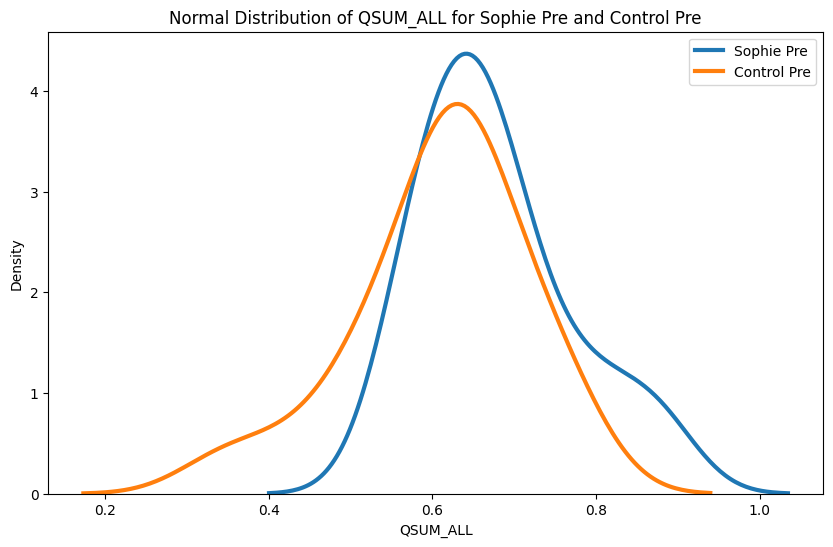

In [ ]:
# prompt: Plot these two graphs in a normal distribution in one figure

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming sophie_pre_all and control_pre_all are your data

plt.figure(figsize=(10, 6))

# Plot the first distribution
sns.distplot(sophie_post_all, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Sophie Pre')

# Plot the second distribution
sns.distplot(control_post_all, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Control Pre')

plt.xlabel('QSUM_ALL')
plt.ylabel('Density')
plt.title('Normal Distribution of QSUM_ALL for Sophie Pre and Control Pre')
plt.legend()
plt.show()

In [ ]:
# prompt: Run a t test to see if there is a statistically significant difference between these two lists

from scipy import stats

t_statistic, p_value = stats.ttest_ind(sophie_post_all, control_post_all)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: 2.255879212813686
P-value: 0.029477396812994917
There is a statistically significant difference between the two groups.


## Finding diff

In [ ]:
control_diff = pd.DataFrame()
control_diff['DIFF_EMPOWER'] = control_post_filtered['QSUM_EMPOWER'] - control_pre_filtered['QSUM_EMPOWER']
control_diff['DIFF_EXPLICIT'] = control_post_filtered['QSUM_EXPLICIT'] - control_pre_filtered['QSUM_EXPLICIT']
control_diff['DIFF_EMPATHY'] = control_post_filtered['QSUM_EMPATHY'] - control_pre_filtered['QSUM_EMPATHY']
control_diff['DIFF_ALL'] = control_post_filtered['QSUM_ALL'] - control_pre_filtered['QSUM_ALL']
control_diff

,DIFF_EMPOWER,DIFF_EXPLICIT,DIFF_EMPATHY,DIFF_ALL
0,0.09500,0.057143,0.086667,0.086957
1,0.02000,0.017143,0.100000,0.038261
2,-0.06000,0.108571,0.000000,0.010435
3,0.40000,0.245714,0.380000,0.349565
4,0.00500,-0.108571,-0.046667,-0.048696
5,0.17500,0.120000,0.146667,0.146087
6,0.13500,0.000000,0.220000,0.118261
7,0.07000,0.091429,0.120000,0.095652
8,0.14000,0.091429,0.186667,0.137391
9,0.20500,0.085714,0.133333,0.142609


In [ ]:
sophie_diff = pd.DataFrame()
sophie_diff['DIFF_EMPOWER'] = sophie_post_filtered['QSUM_EMPOWER'] - sophie_pre_filtered['QSUM_EMPOWER']
sophie_diff['DIFF_EXPLICIT'] = sophie_post_filtered['QSUM_EXPLICIT'] - sophie_pre_filtered['QSUM_EXPLICIT']
sophie_diff['DIFF_EMPATHY'] = sophie_post_filtered['QSUM_EMPATHY'] - sophie_pre_filtered['QSUM_EMPATHY']
sophie_diff['DIFF_ALL'] = sophie_post_filtered['QSUM_ALL'] - sophie_pre_filtered['QSUM_ALL']
sophie_diff

,DIFF_EMPOWER,DIFF_EXPLICIT,DIFF_EMPATHY,DIFF_ALL
0,0.040000,0.045714,-0.013333,0.022609
1,-0.100000,-0.034286,-0.013333,-0.050435
2,0.050000,0.182857,-0.033333,0.069565
3,0.295000,0.160000,0.246667,0.231304
4,0.315000,-0.017143,0.333333,0.217391
5,0.030000,-0.068571,0.040000,0.001739
6,0.217500,0.171429,0.145000,0.175217
7,0.221667,0.156190,0.104444,0.160000
8,0.115000,0.062857,-0.100000,0.034783
9,0.235000,-0.034286,0.040000,0.088696


In [ ]:
control_diff['DIFF_ALL'].mean()

np.float64(0.07286956521739131)

In [ ]:
sophie_diff['DIFF_ALL'].mean()

np.float64(0.13706994328922495)

In [ ]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(list(sophie_diff['DIFF_ALL']), list(control_diff['DIFF_ALL']))

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: 2.179256760557568
P-value: 0.035112546669975535
There is a statistically significant difference between the two groups.


In [ ]:
# prompt: Now do all of that for QSUM_EMPOWER

# Filtering EMPOWER

Min max normalization

In [ ]:
sophie_pre_empr = sorted(list(sophie_pre['QSUM_EMPOWER']))
control_pre_empr = sorted(list(control_pre['QSUM_EMPOWER']))

sophie_pre_empr, control_pre_empr

([0.225,
  0.275,
  0.30999999999999994,
  0.31,
  0.31,
  0.3350000000000001,
  0.35,
  0.375,
  0.38,
  0.39,
  0.39,
  0.395,
  0.40499999999999997,
  0.41,
  0.41500000000000004,
  0.41500000000000004,
  0.425,
  0.45999999999999996,
  0.47000000000000003,
  0.47000000000000003,
  0.48,
  0.485,
  0.505,
  0.5700000000000001,
  0.58,
  0.645],
 [0.3,
  0.3,
  0.31875,
  0.325,
  0.32999999999999996,
  0.32999999999999996,
  0.34500000000000003,
  0.37,
  0.445,
  0.45,
  0.46499999999999997,
  0.49000000000000005,
  0.49000000000000005,
  0.51,
  0.515,
  0.515,
  0.52,
  0.5599999999999999,
  0.5650000000000001,
  0.5700000000000001,
  0.65,
  0.67,
  0.72,
  0.72,
  0.775])

<ipython-input-67-abe867ff9839>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sophie_pre_empr, hist=False, kde=True,
<ipython-input-67-abe867ff9839>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_pre_empr, hist=False, kde=True,


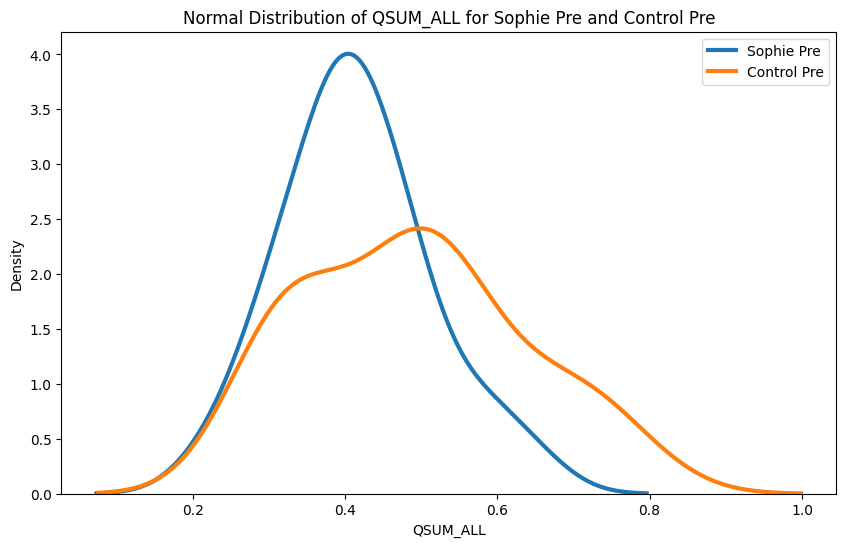

In [ ]:
# prompt: Plot these two graphs in a normal distribution in one figure

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming sophie_pre_all and control_pre_all are your data

plt.figure(figsize=(10, 6))

# Plot the first distribution
sns.distplot(sophie_pre_empr, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Sophie Pre')

# Plot the second distribution
sns.distplot(control_pre_empr, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Control Pre')

plt.xlabel('QSUM_ALL')
plt.ylabel('Density')
plt.title('Normal Distribution of QSUM_ALL for Sophie Pre and Control Pre')
plt.legend()
plt.show()


In [ ]:
# prompt: Run a t test to see if there is a statistically significant difference between these two lists

from scipy import stats

t_statistic, p_value = stats.ttest_ind(sophie_pre_empr, control_pre_empr)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: -2.222291404757024
P-value: 0.030911392856161127
There is a statistically significant difference between the two groups.


In [ ]:
sophie_pre_filtered = sophie_pre[sophie_pre['QSUM_EMPOWER'] > control_pre_empr[0]].reset_index(drop=True)
control_pre_filtered = control_pre[control_pre['QSUM_EMPOWER'] < sophie_pre_empr[-1]].reset_index(drop=True)
sophie_pids = list(sophie_pre_filtered['P_ID'])
control_pids = list(control_pre_filtered['P_ID'])
control_pre_empr_filtered = sorted(list(control_pre_filtered['QSUM_EMPOWER']))
sophie_pre_empr_filtered = sorted(list(sophie_pre_filtered['QSUM_EMPOWER']))

In [ ]:
sophie_pre_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,1,S,First,0.390,0.748571,0.573333,0.556522
1,2,S,First,0.645,0.811429,0.646667,0.692174
2,7,S,First,0.485,0.611429,0.653333,0.573913
3,13,S,First,0.310,0.634286,0.360000,0.426087
4,17,S,First,0.470,0.737143,0.473333,0.547826
5,20,S,First,0.375,0.805714,0.680000,0.606957
6,21,S,First,0.395,0.657143,0.513333,0.518261
7,22,S,First,0.570,0.748571,0.873333,0.726957
8,25,S,First,0.470,0.708571,0.686667,0.610435
9,28,S,First,0.350,0.720000,0.460000,0.490435


In [ ]:
control_pre_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,4,C,First,0.44500,0.594286,0.566667,0.526957
1,5,C,First,0.51500,0.720000,0.613333,0.613913
2,6,C,First,0.51500,0.737143,0.653333,0.624348
3,8,C,First,0.33000,0.542857,0.393333,0.412174
4,11,C,First,0.51000,0.737143,0.633333,0.619130
5,16,C,First,0.46500,0.674286,0.526667,0.551304
6,19,C,First,0.37000,0.828571,0.393333,0.520000
7,23,C,First,0.34500,0.565714,0.426667,0.433043
8,24,C,First,0.45000,0.645714,0.460000,0.518261
9,29,C,First,0.32500,0.634286,0.453333,0.464348


In [ ]:
control_pre_empr_filtered, sophie_pre_empr_filtered

([0.3,
  0.3,
  0.31875,
  0.325,
  0.32999999999999996,
  0.32999999999999996,
  0.34500000000000003,
  0.37,
  0.445,
  0.45,
  0.46499999999999997,
  0.49000000000000005,
  0.49000000000000005,
  0.51,
  0.515,
  0.515,
  0.52,
  0.5599999999999999,
  0.5650000000000001,
  0.5700000000000001],
 [0.30999999999999994,
  0.31,
  0.31,
  0.3350000000000001,
  0.35,
  0.375,
  0.38,
  0.39,
  0.39,
  0.395,
  0.40499999999999997,
  0.41,
  0.41500000000000004,
  0.41500000000000004,
  0.425,
  0.45999999999999996,
  0.47000000000000003,
  0.47000000000000003,
  0.48,
  0.485,
  0.505,
  0.5700000000000001,
  0.58,
  0.645])

## Pre difference

<ipython-input-73-653f246fb30b>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sophie_pre_empr_filtered, hist=False, kde=True,
<ipython-input-73-653f246fb30b>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_pre_empr_filtered, hist=False, kde=True,


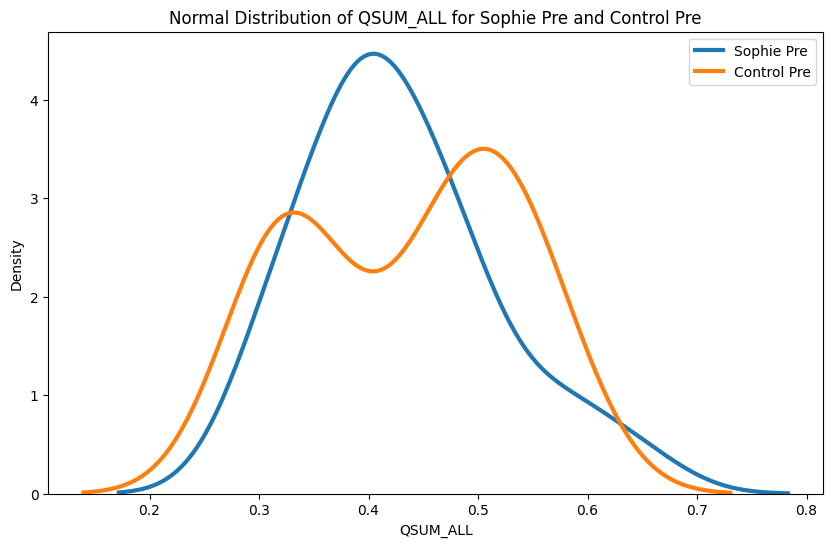

In [ ]:
# prompt: Plot these two graphs in a normal distribution in one figure

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming sophie_pre_all and control_pre_all are your data

plt.figure(figsize=(10, 6))

# Plot the first distribution
sns.distplot(sophie_pre_empr_filtered, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Sophie Pre')

# Plot the second distribution
sns.distplot(control_pre_empr_filtered, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Control Pre')

plt.xlabel('QSUM_ALL')
plt.ylabel('Density')
plt.title('Normal Distribution of QSUM_ALL for Sophie Pre and Control Pre')
plt.legend()
plt.show()

In [ ]:
# prompt: Run a t test to see if there is a statistically significant difference between these two lists

from scipy import stats

t_statistic, p_value = stats.ttest_ind(sophie_pre_empr_filtered, control_pre_empr_filtered)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: -0.2646928841971103
P-value: 0.7925407548138641
There is no statistically significant difference between the two groups.


## Post difference

In [ ]:
control_post_filtered = control_post[control_post['P_ID'].isin(control_pids)].reset_index(drop=True)
control_post_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,4,C,Second,0.540,0.651429,0.653333,0.613913
1,5,C,Second,0.535,0.737143,0.713333,0.652174
2,6,C,Second,0.455,0.845714,0.653333,0.634783
3,8,C,Second,0.730,0.788571,0.773333,0.761739
4,11,C,Second,0.515,0.628571,0.586667,0.570435
5,16,C,Second,0.640,0.794286,0.673333,0.697391
6,19,C,Second,0.505,0.828571,0.613333,0.638261
7,23,C,Second,0.415,0.657143,0.546667,0.528696
8,24,C,Second,0.590,0.737143,0.646667,0.655652
9,29,C,Second,0.530,0.720000,0.586667,0.606957


In [ ]:
sophie_post_filtered = sophie_post[sophie_post['P_ID'].isin(sophie_pids)].reset_index(drop=True)
sophie_post_filtered

,P_ID,ARM,FIRST_SECOND,QSUM_EMPOWER,QSUM_EXPLICIT,QSUM_EMPATHY,QSUM_ALL
0,1,S,Second,0.430000,0.794286,0.560000,0.579130
1,2,S,Second,0.545000,0.777143,0.633333,0.641739
2,7,S,Second,0.535000,0.794286,0.620000,0.643478
3,13,S,Second,0.605000,0.794286,0.606667,0.657391
4,17,S,Second,0.785000,0.720000,0.806667,0.765217
5,20,S,Second,0.405000,0.737143,0.720000,0.608696
6,21,S,Second,0.612500,0.828571,0.658333,0.693478
7,22,S,Second,0.791667,0.904762,0.977778,0.886957
8,25,S,Second,0.585000,0.771429,0.586667,0.645217
9,28,S,Second,0.585000,0.685714,0.500000,0.579130


In [ ]:
sophie_post_emp = sorted(list(sophie_post_filtered['QSUM_EMPOWER']))
control_post_emp = sorted(list(control_post_filtered['QSUM_EMPOWER']))

<ipython-input-78-e4678af72378>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sophie_post_emp, hist=False, kde=True,
<ipython-input-78-e4678af72378>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(control_post_emp, hist=False, kde=True,


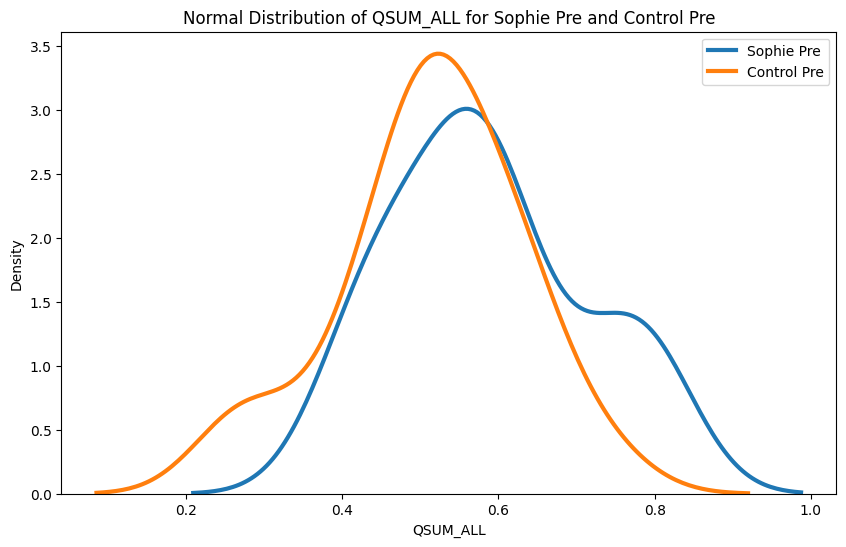

In [ ]:
# prompt: Plot these two graphs in a normal distribution in one figure

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming sophie_pre_all and control_pre_all are your data

plt.figure(figsize=(10, 6))

# Plot the first distribution
sns.distplot(sophie_post_emp, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Sophie Pre')

# Plot the second distribution
sns.distplot(control_post_emp, hist=False, kde=True,
             kde_kws={'linewidth': 3}, label='Control Pre')

plt.xlabel('QSUM_ALL')
plt.ylabel('Density')
plt.title('Normal Distribution of QSUM_ALL for Sophie Pre and Control Pre')
plt.legend()
plt.show()

In [ ]:
# prompt: Run a t test to see if there is a statistically significant difference between these two lists

from scipy import stats

t_statistic, p_value = stats.ttest_ind(sophie_post_emp, control_post_emp)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: 2.0202805963014487
P-value: 0.04976204739928083
There is a statistically significant difference between the two groups.


## Finding filtered diff

In [ ]:
control_filtered_diff = pd.DataFrame()
control_filtered_diff['DIFF_EMPOWER'] = control_post_filtered['QSUM_EMPOWER'] - control_pre_filtered['QSUM_EMPOWER']
control_filtered_diff['DIFF_EXPLICIT'] = control_post_filtered['QSUM_EXPLICIT'] - control_pre_filtered['QSUM_EXPLICIT']
control_filtered_diff['DIFF_EMPATHY'] = control_post_filtered['QSUM_EMPATHY'] - control_pre_filtered['QSUM_EMPATHY']
control_filtered_diff['DIFF_ALL'] = control_post_filtered['QSUM_ALL'] - control_pre_filtered['QSUM_ALL']
control_filtered_diff

,DIFF_EMPOWER,DIFF_EXPLICIT,DIFF_EMPATHY,DIFF_ALL
0,0.09500,0.057143,0.086667,0.086957
1,0.02000,0.017143,0.100000,0.038261
2,-0.06000,0.108571,0.000000,0.010435
3,0.40000,0.245714,0.380000,0.349565
4,0.00500,-0.108571,-0.046667,-0.048696
5,0.17500,0.120000,0.146667,0.146087
6,0.13500,0.000000,0.220000,0.118261
7,0.07000,0.091429,0.120000,0.095652
8,0.14000,0.091429,0.186667,0.137391
9,0.20500,0.085714,0.133333,0.142609


In [ ]:
sophie_filtered_diff = pd.DataFrame()
sophie_filtered_diff['DIFF_EMPOWER'] = sophie_post_filtered['QSUM_EMPOWER'] - sophie_pre_filtered['QSUM_EMPOWER']
sophie_filtered_diff['DIFF_EXPLICIT'] = sophie_post_filtered['QSUM_EXPLICIT'] - sophie_pre_filtered['QSUM_EXPLICIT']
sophie_filtered_diff['DIFF_EMPATHY'] = sophie_post_filtered['QSUM_EMPATHY'] - sophie_pre_filtered['QSUM_EMPATHY']
sophie_filtered_diff['DIFF_ALL'] = sophie_post_filtered['QSUM_ALL'] - sophie_pre_filtered['QSUM_ALL']
sophie_filtered_diff

,DIFF_EMPOWER,DIFF_EXPLICIT,DIFF_EMPATHY,DIFF_ALL
0,0.040000,0.045714,-0.013333,0.022609
1,-0.100000,-0.034286,-0.013333,-0.050435
2,0.050000,0.182857,-0.033333,0.069565
3,0.295000,0.160000,0.246667,0.231304
4,0.315000,-0.017143,0.333333,0.217391
5,0.030000,-0.068571,0.040000,0.001739
6,0.217500,0.171429,0.145000,0.175217
7,0.221667,0.156190,0.104444,0.160000
8,0.115000,0.062857,-0.100000,0.034783
9,0.235000,-0.034286,0.040000,0.088696


In [ ]:
control_filtered_diff['DIFF_EMPOWER'].mean()

np.float64(0.07781250000000002)

In [ ]:
sophie_filtered_diff['DIFF_EMPOWER'].mean()

np.float64(0.15829861111111113)

In [ ]:
from scipy import stats

t_statistic, p_value = stats.ttest_ind(list(sophie_filtered_diff['DIFF_ALL']), list(control_filtered_diff['DIFF_ALL']))

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
  print("There is a statistically significant difference between the two groups.")
else:
  print("There is no statistically significant difference between the two groups.")

T-statistic: 2.278868967865434
P-value: 0.027822481575314254
There is a statistically significant difference between the two groups.


In [ ]:
compare_columns(sophie_filtered_diff['DIFF_EMPOWER'], control_filtered_diff['DIFF_EMPOWER'])

P-value: 0.036
Cohen's d: 0.65


# Diagrams

## 1X2 KDE

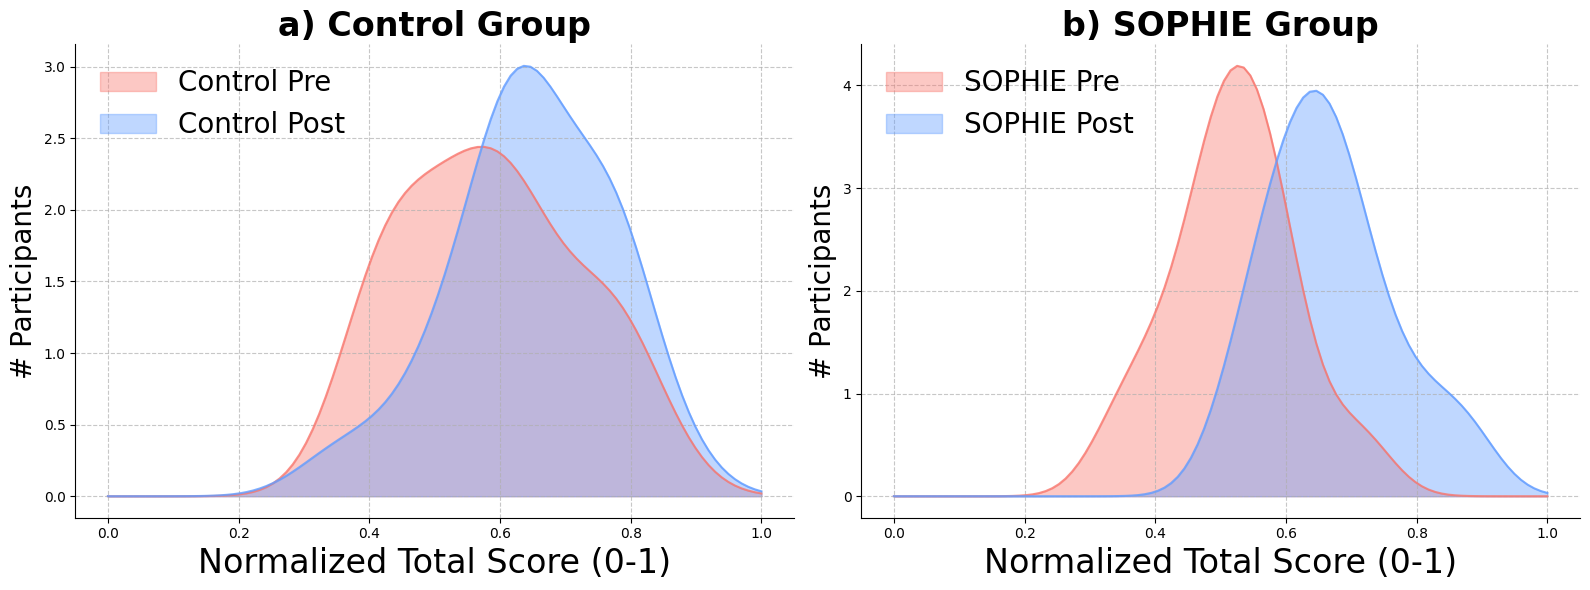

In [ ]:
# prompt: Make two side by side graphs. First showing Control pre, Control post, second graph showing SOPHIE pre, SOPHIE post

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Assuming data1, data2, data3, data4 are already defined as in your original code

# Example input data (replace with your lists)
data1 = list(control_pre['QSUM_ALL'])
data2 = list(control_post['QSUM_ALL'])
data3 = list(sophie_pre['QSUM_ALL'])
data4 = list(sophie_post['QSUM_ALL'])

# Generate kernel density estimates
x = np.linspace(0, 1, 100)
kde1 = gaussian_kde(data1)
kde2 = gaussian_kde(data2)
kde3 = gaussian_kde(data3)
kde4 = gaussian_kde(data4)

# Use a professional muted color palette
colors = ['#619CFF', '#F8766D', '#00BA38', '#C77CFF']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create two subplots

# Plot for Control Group
axes[0].fill_between(x, kde1(x), alpha=0.4, color=colors[1], label='Control Pre')
axes[0].fill_between(x, kde2(x), alpha=0.4, color=colors[0], label='Control Post')
axes[0].plot(x, kde1(x), color=colors[1], alpha=0.8)
axes[0].plot(x, kde2(x), color=colors[0], alpha=0.8)
axes[0].legend(frameon=False, fontsize=20)
axes[0].set_title('a) Control Group', fontsize=24, weight='bold')
axes[0].set_xlabel('Normalized Total Score (0-1)', fontsize=24)
axes[0].set_ylabel('# Participants', fontsize=20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(True, linestyle='--', alpha=0.7)


# Plot for SOPHIE Group
axes[1].fill_between(x, kde3(x), alpha=0.4, color=colors[1], label='SOPHIE Pre')
axes[1].fill_between(x, kde4(x), alpha=0.4, color=colors[0], label='SOPHIE Post')
axes[1].plot(x, kde3(x), color=colors[1], alpha=0.8)
axes[1].plot(x, kde4(x), color=colors[0], alpha=0.8)
axes[1].legend(frameon=False, fontsize=20)
axes[1].set_title('b) SOPHIE Group', fontsize=24, weight='bold')
axes[1].set_xlabel('Normalized Total Score (0-1)', fontsize=24)
axes[1].set_ylabel('# Participants', fontsize=20)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(True, linestyle='--', alpha=0.7)

# plt.suptitle('Distribution of Score before and after treatment', fontsize=16, weight='bold', y=1.02) # Main title
plt.tight_layout() # Adjust layout to prevent overlapping

# Save to PDF
pdf_path = "normal-curves.pdf"
plt.savefig(pdf_path, format="pdf")

# Show
plt.show()
plt.close()

## Histogram 1 (overlapping)

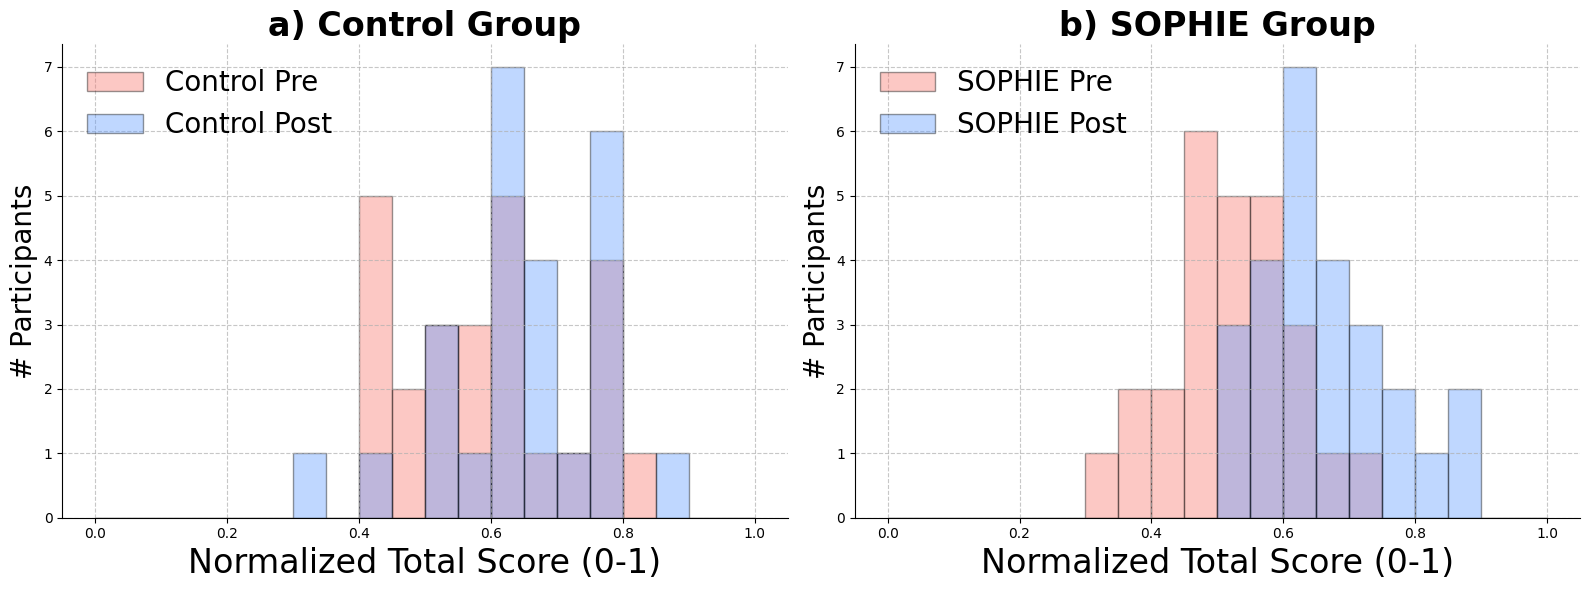

In [ ]:
# If you need to install matplotlib, run:
# !pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Example input data (replace with your lists)
data1 = list(control_pre['QSUM_ALL'])
data2 = list(control_post['QSUM_ALL'])
data3 = list(sophie_pre['QSUM_ALL'])
data4 = list(sophie_post['QSUM_ALL'])

# Define bin size
bin_size = 0.05
bins = np.arange(0, 1 + bin_size, bin_size)

# Use a muted color palette
colors = ['#619CFF', '#F8766D', '#00BA38', '#C77CFF']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create two subplots side by side

# Plot for Control Group
axes[0].hist(data1, bins=bins, alpha=0.4, color=colors[1], label='Control Pre', edgecolor='black')
axes[0].hist(data2, bins=bins, alpha=0.4, color=colors[0], label='Control Post', edgecolor='black')
axes[0].legend(frameon=False, fontsize=20)
axes[0].set_title('a) Control Group', fontsize=24, weight='bold')
axes[0].set_xlabel('Normalized Total Score (0-1)', fontsize=24)
axes[0].set_ylabel('# Participants', fontsize=20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot for SOPHIE Group
axes[1].hist(data3, bins=bins, alpha=0.4, color=colors[1], label='SOPHIE Pre', edgecolor='black')
axes[1].hist(data4, bins=bins, alpha=0.4, color=colors[0], label='SOPHIE Post', edgecolor='black')
axes[1].legend(frameon=False, fontsize=20)
axes[1].set_title('b) SOPHIE Group', fontsize=24, weight='bold')
axes[1].set_xlabel('Normalized Total Score (0-1)', fontsize=24)
axes[1].set_ylabel('# Participants', fontsize=20)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlapping

# Save to PDF
pdf_path = "normal-histograms.pdf"
plt.savefig(pdf_path, format="pdf")

# Show the plots
plt.show()
plt.close()


## Histogram 2 (Side-by-Side)

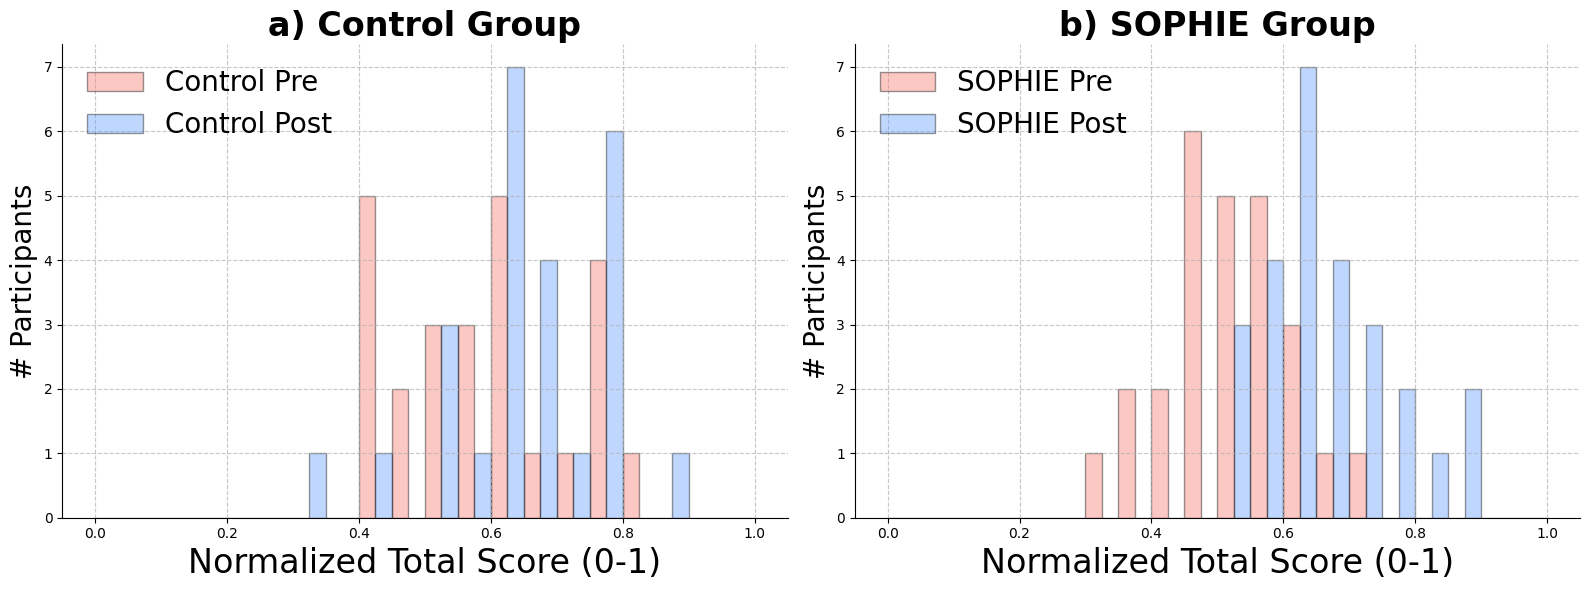

In [ ]:
# If you need to install matplotlib, run:
# !pip install matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Example input data (replace these with your actual lists)
data1 = list(control_pre['QSUM_ALL'])
data2 = list(control_post['QSUM_ALL'])
data3 = list(sophie_pre['QSUM_ALL'])
data4 = list(sophie_post['QSUM_ALL'])

# Define bin size and create bins
bin_size = 0.05
bins = np.arange(0, 1 + bin_size, bin_size)

# Calculate histogram values manually for side-by-side bars
def get_hist_vals(data, bins):
    counts, edges = np.histogram(data, bins=bins)
    centers = (edges[:-1] + edges[1:]) / 2.0  # Midpoints of bins
    return counts, centers

# Get histogram info for each dataset
count1, center1 = get_hist_vals(data1, bins)
count2, center2 = get_hist_vals(data2, bins)
count3, center3 = get_hist_vals(data3, bins)
count4, center4 = get_hist_vals(data4, bins)

# Bar width will be half the bin size so we can place them side by side
bar_width = bin_size / 2.0
offset = bar_width / 2.0

# Muted color palette
colors = ['#619CFF', '#F8766D', '#00BA38', '#C77CFF']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Control Group
axes[0].bar(
    center1 - offset, count1,
    width=bar_width,
    alpha=0.4,
    color=colors[1],
    edgecolor='black',
    label='Control Pre'
)
axes[0].bar(
    center2 + offset, count2,
    width=bar_width,
    alpha=0.4,
    color=colors[0],
    edgecolor='black',
    label='Control Post'
)
axes[0].legend(frameon=False, fontsize=20)
axes[0].set_title('a) Control Group', fontsize=24, weight='bold')
axes[0].set_xlabel('Normalized Total Score (0-1)', fontsize=24)
axes[0].set_ylabel('# Participants', fontsize=20)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot for SOPHIE Group
axes[1].bar(
    center3 - offset, count3,
    width=bar_width,
    alpha=0.4,
    color=colors[1],
    edgecolor='black',
    label='SOPHIE Pre'
)
axes[1].bar(
    center4 + offset, count4,
    width=bar_width,
    alpha=0.4,
    color=colors[0],
    edgecolor='black',
    label='SOPHIE Post'
)
axes[1].legend(frameon=False, fontsize=20)
axes[1].set_title('b) SOPHIE Group', fontsize=24, weight='bold')
axes[1].set_xlabel('Normalized Total Score (0-1)', fontsize=24)
axes[1].set_ylabel('# Participants', fontsize=20)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Save to PDF
pdf_path = "side_by_side_histograms.pdf"
plt.savefig(pdf_path, format="pdf")

plt.show()
plt.close()


## Diff bar chart

In [ ]:
control_diff = pd.DataFrame()
control_diff['DIFF_EMPOWER'] = control_post['QSUM_EMPOWER'] - control_pre['QSUM_EMPOWER']
control_diff['DIFF_EXPLICIT'] = control_post['QSUM_EXPLICIT'] - control_pre['QSUM_EXPLICIT']
control_diff['DIFF_EMPATHY'] = control_post['QSUM_EMPATHY'] - control_pre['QSUM_EMPATHY']
control_diff['DIFF_ALL'] = control_post['QSUM_ALL'] - control_pre['QSUM_ALL']

In [ ]:
sophie_diff = pd.DataFrame()
sophie_diff['DIFF_EMPOWER'] = sophie_post['QSUM_EMPOWER'] - sophie_pre['QSUM_EMPOWER']
sophie_diff['DIFF_EXPLICIT'] = sophie_post['QSUM_EXPLICIT'] - sophie_pre['QSUM_EXPLICIT']
sophie_diff['DIFF_EMPATHY'] = sophie_post['QSUM_EMPATHY'] - sophie_pre['QSUM_EMPATHY']
sophie_diff['DIFF_ALL'] = sophie_post['QSUM_ALL'] - sophie_pre['QSUM_ALL']

In [ ]:
sophie_delta_empower = list(sophie_diff['DIFF_EMPOWER'])
sophie_delta_explicit = list(sophie_diff['DIFF_EXPLICIT'])
sophie_delta_empathy = list(sophie_diff['DIFF_EMPATHY'])
sophie_delta_all = list(sophie_diff['DIFF_ALL'])

control_delta_empower = list(control_diff['DIFF_EMPOWER'])
control_delta_explicit = list(control_diff['DIFF_EXPLICIT'])
control_delta_empathy = list(control_diff['DIFF_EMPATHY'])
control_delta_all = list(control_diff['DIFF_ALL'])

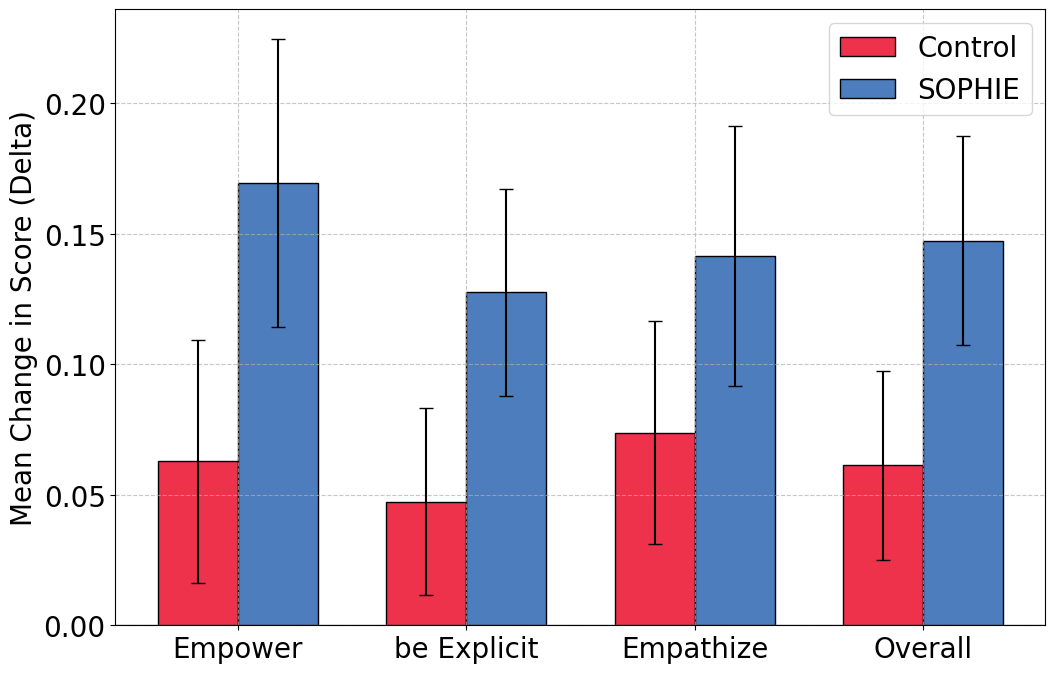

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate means and 95% CIs for Sophie and Control groups
sophie_means = [
    np.mean(sophie_delta_empower),
    np.mean(sophie_delta_explicit),
    np.mean(sophie_delta_empathy),
    np.mean(sophie_delta_all)
]

sophie_cis = [
    stats.sem(sophie_delta_empower) * stats.t.ppf((1 + 0.95) / 2., len(sophie_delta_empower) - 1),
    stats.sem(sophie_delta_explicit) * stats.t.ppf((1 + 0.95) / 2., len(sophie_delta_explicit) - 1),
    stats.sem(sophie_delta_empathy) * stats.t.ppf((1 + 0.95) / 2., len(sophie_delta_empathy) - 1),
    stats.sem(sophie_delta_all) * stats.t.ppf((1 + 0.95) / 2., len(sophie_delta_all) - 1)
]

control_means = [
    np.mean(control_delta_empower),
    np.mean(control_delta_explicit),
    np.mean(control_delta_empathy),
    np.mean(control_delta_all)
]

control_cis = [
    stats.sem(control_delta_empower) * stats.t.ppf((1 + 0.95) / 2., len(control_delta_empower) - 1),
    stats.sem(control_delta_explicit) * stats.t.ppf((1 + 0.95) / 2., len(control_delta_explicit) - 1),
    stats.sem(control_delta_empathy) * stats.t.ppf((1 + 0.95) / 2., len(control_delta_empathy) - 1),
    stats.sem(control_delta_all) * stats.t.ppf((1 + 0.95) / 2., len(control_delta_all) - 1)
]

# Set larger font sizes
plt.rcParams.update({
    'font.size': 16,           # Default font size
    'axes.titlesize': 22,      # Title size
    'axes.labelsize': 20,      # Axis label size
    'xtick.labelsize': 20,     # X-axis tick label size
    'ytick.labelsize': 20,     # Y-axis tick label size
    'legend.fontsize': 20      # Legend size
})

# Plot
labels = ['Empower', 'be Explicit', 'Empathize', 'Overall']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 8))
plt.bar(x - width/2, control_means, width, yerr=control_cis, capsize=5, label='Control', color='#EE324B', edgecolor='black')
plt.bar(x + width/2, sophie_means, width, yerr=sophie_cis, capsize=5, label='SOPHIE', color='#4D7DBD', edgecolor='black')

plt.axhline(0, color='gray', linewidth=1)
plt.xticks(x, labels)
plt.ylabel('Mean Change in Score (Delta)')
# plt.title('Comparison of Communication Skills Improvement (Mean and 95% CI)')

# Add dashed grid
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Save to PDF
pdf_path = "Visualizing_Confidence_Intervals.pdf"
plt.savefig(pdf_path, format="pdf")


plt.show()
